In [6]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import sys
import pandas as pd

In [7]:
csv_file = 'losses_seed_20241002_145744.csv'
data = pd.read_csv(csv_file)
# data.index.iloc[1]

In [8]:
data.keys()
processed = {}
epoch = 0
processed[f'epoch_{epoch}'] = {}
processed[f'epoch_{epoch}']['actor'] = []
processed[f'epoch_{epoch}']['critic'] = []
for index in range(len(data) - 1):  # Iterate till the last but one row
    row = data.iloc[index]
    if data.iloc[index + 1]['iteration'] < row['iteration']:
        # average_loss = np.mean(processed[f'epoch_{epoch}'])
        epoch += 1
        processed[f'epoch_{epoch}'] = {}
        processed[f'epoch_{epoch}']['actor'] = []
        processed[f'epoch_{epoch}']['critic'] = []
    else: 
        processed[f'epoch_{epoch}']['actor'].append(row['actor_loss'])
        processed[f'epoch_{epoch}']['critic'].append(row['critic_loss'])
    # print(row)

In [9]:
processed.keys()
np.mean(processed['epoch_0']['actor'])

np.float64(-7.7295241493123905)

Text(0.5, 0, 'Epoch')

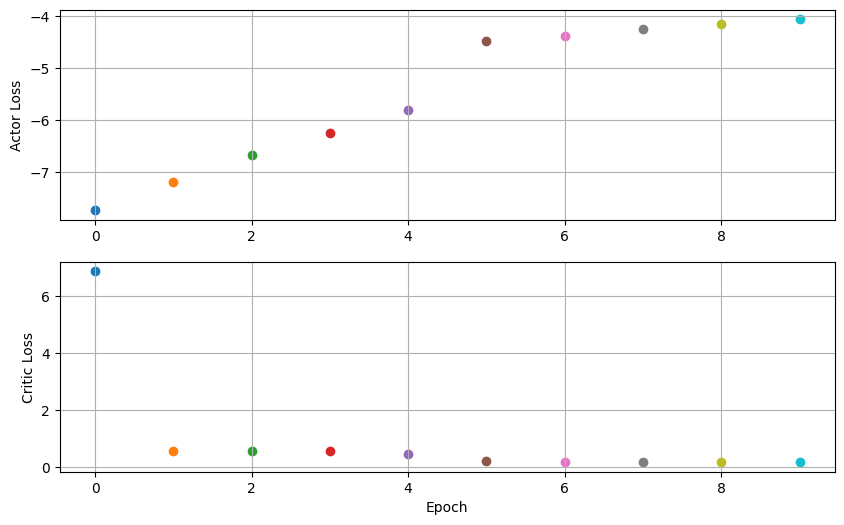

In [10]:
fig, axs = plt.subplots(2,1,figsize=(10,6))
for epoch in range(len(processed.keys())):
    axs[0].scatter(epoch, np.mean(processed[f'epoch_{epoch}']['actor']))
    axs[1].scatter(epoch, np.mean(processed[f'epoch_{epoch}']['critic']))
axs[0].grid(True)
axs[1].grid(True)
axs[0].set_ylabel("Actor Loss")
axs[1].set_ylabel("Critic Loss")
axs[1].set_xlabel("Epoch")
